In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(Measure.date).order_by(Measure.date.desc()).first()

('2017-08-23',)

Text(0, 0.5, 'Inches')

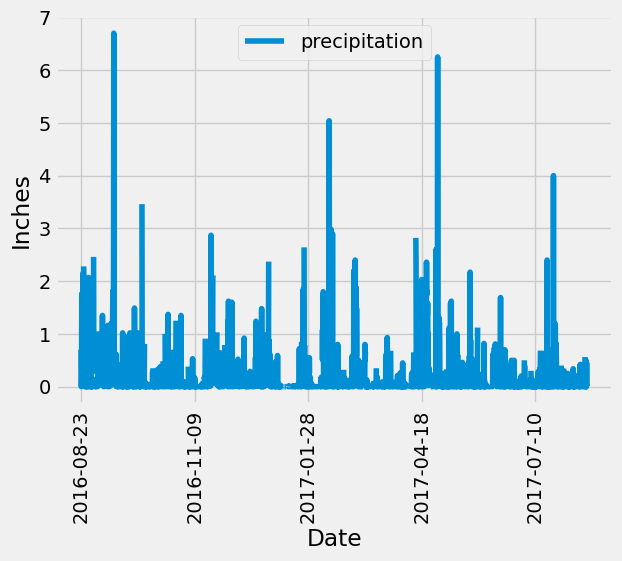

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
current_date = session.query(Measure.date).order_by(Measure.date.desc()).first()[0]
prev_year = dt.datetime.strftime(dt.datetime.strptime(current_date,'%Y-%m-%d') - dt.timedelta(days = 365),'%Y-%m-%d')

# Perform a query to retrieve the data and precipitation scores
date_prcp = session.query(Measure.date,Measure.prcp).\
    filter(Measure.date >= prev_year).\
    order_by(Measure.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(date_prcp,columns = ['Date','precipitation'])

# Sort the dataframe by date
prcp_df.sort_values('Date',inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot('Date','precipitation',rot = 90)
plt.ylabel('Inches')
# plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measure.station,func.count(Measure.station)).group_by(Measure.station).order_by(func.count(Measure.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
station_name = active_stations[0][0]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measure.tobs),func.max(Measure.tobs),func.avg(Measure.tobs)).filter(Measure.station == station_name).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

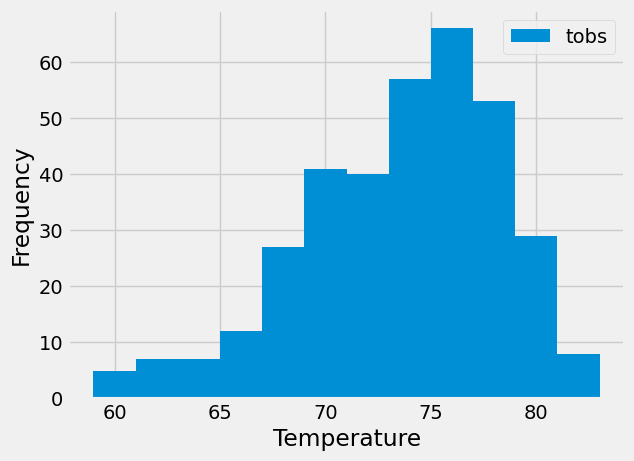

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measure.tobs).filter(Measure.station == station_name).filter(Measure.date >= prev_year).all()
pd.DataFrame(temps).plot(kind='hist',bins=12)
plt.xlabel('Temperature')

# Close Session

In [17]:
# Close Session
session.close()